In [1]:
import time, random, sys, re
import socket
import urllib.request

import seaborn as sns; 
sns.set(style="darkgrid")

import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

ЗАГРУЗКА ДАННЫХ
---

In [2]:
class ad:
    _block = None
    _type = None
    _data_publication = None
    _text = None
    _data_dedline = None
    _name_documents = None
    
    def __init__(self, html_block, time_sleep=1):
        self._block = html_block
        self._time_sleep = time_sleep

    @property
    def type_ad(self):
        if not self._type:
            try:
                self._type = self._block.find_all('td')[0].string
            except ValueError:
                pass
            except IndexError:
                pass
        return self._type
    
    @property
    def data_publication(self):
        if not self._data_publication:
            try:
                self._data_publication = {}
                self._data_publication['mount'] = self._block.find_all('td')[1].contents[1].lstrip()
                self._data_publication['number'] = int(self._block.find_all('td')[1].find('strong').string)
            except ValueError:
                pass
            except IndexError:
                pass
        return self._data_publication

    @property
    def text(self):
        if not self._text:
            try:
                self._text = self._block.find_all('td')[2].string
            except ValueError:
                pass
            except IndexError:
                pass
        return self._text

    @property
    def data_dedline(self):
        if not self._data_dedline:
            try:
                date = self._block.find_all('td')[3].string
                result = re.search(r'(\d+.\d+.\d+)', date)
                self._data_dedline = result.group()
            except ValueError:
                pass
            except IndexError:
                pass
            except AttributeError:
                pass
        return self._data_dedline 

    @property
    def name_documents(self):
        if not self._name_documents:
            try:
                self._name_documents = self._block.find_all('td')[4].find_all('a')
            except ValueError:
                pass
            except IndexError:
                pass
        return self._name_documents

In [3]:
%%time

ad_list = []
n_pages = 200
for i_page in range(n_pages):
    url = 'http://kali.by/tenders/?PAGEN_1={0}'.format(i_page)
    page = urllib.request.urlopen(url).read().decode('utf-8')
    main_soup = BeautifulSoup(page, "html.parser")
    
    for b in main_soup.find_all('tr'):
        try:
            t = ad(b)
            ad_list.append(t)
        except IndexError:
            pass
    time.sleep(0.1) # распределение нагрузки на сайt
    sys.stdout.write('\rзагружено {0:.4}%   '.format((i_page+1)/n_pages*100))

загружено 100.0%   CPU times: user 23.9 s, sys: 880 ms, total: 24.8 s
Wall time: 1min 2s


In [4]:
dataset = pd.DataFrame()
dataset['text'] = [e.text for e in ad_list]
dataset['data_dedline'] = [e.data_dedline for e in ad_list]
dataset['type'] = [e.type_ad for e in ad_list]
dataset = dataset.dropna() #очистка от пропущенных значений
dataset

,text,data_dedline,type
1,Инклинометр двухосевой,12.02.2018,Изучение конъюнктуры рынка
2,Закупка запасных частей к электрическим плитам,14.02.2018,Изучение конъюнктуры рынка
3,Закупка компрессора Embraco,14.02.2018,Изучение конъюнктуры рынка
4,"Силовые полупроводниковые приборы (диоды, тири...",23.02.2018,Оформление конкурентного листа
5,Закупка нестандартного оборудования,11-00 07,Открытый конкурс
6,Запасные части для ГТУ,12.02.2018,Оформление конкурентного листа
7,Закупка ванны моечной,13.02.2018,Переговоры
8,Пластинчатый сгуститель ти-па LTC-3450-18F (ил...,13.03.2018,Торги
9,Запасные части для теплообменника Sondex A/S,12.02.2018,Изучение конъюнктуры рынка
10,Сигнализаторы и аварийные выключатели с тросов...,08.02.2018,Изучение конъюнктуры рынка


АНАЛИЗ ДАННЫХ
---

In [5]:
import numpy as np

In [6]:
# Предварительно весь текст приводится к нижнему регистру
dataset['text'] = dataset['text'].str.lower()

## Анализ типов закупки

In [7]:
from collections import Counter
Counter(dataset['type'])

Counter({'Закупка из одного источника': 89,
         'Запрос ценовых предложений': 786,
         'Изучение конъюнктуры рынка': 729,
         'Открытый конкурс': 247,
         'Оформление конкурентного листа': 1322,
         'Переговоры': 251,
         'Торги': 334})

## Анализ текста

In [8]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
corpus = dataset['text']

#### Создание векторизатора слов и н-грамм

In [10]:
%%time
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 100))
word_vectorizer.fit(corpus)

CPU times: user 1.5 s, sys: 24 ms, total: 1.53 s
Wall time: 1.6 s


#### Создание векторизатора букв

In [11]:
%%time
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(1, 10))
char_vectorizer.fit(corpus)

CPU times: user 8 s, sys: 192 ms, total: 8.19 s
Wall time: 8.2 s


#### Слияние векторизаторов

In [12]:
%%time
X = hstack([word_vectorizer.transform(corpus), char_vectorizer.transform(corpus)])
print(X.shape)

(3758, 419496)
CPU times: user 6.01 s, sys: 16 ms, total: 6.03 s
Wall time: 6.03 s


/home/bv/.local/lib/python3.5/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


CPU times: user 8.28 s, sys: 1.24 s, total: 9.52 s
Wall time: 6.8 s


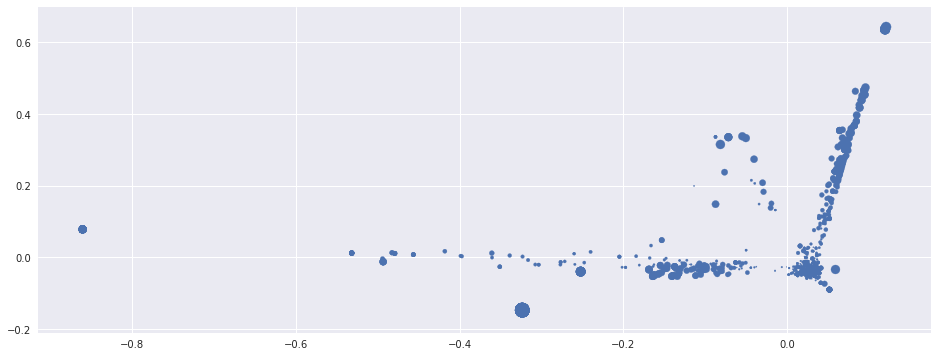

In [13]:
%%time
from sklearn.decomposition import KernelPCA
data_projected = KernelPCA(n_components=3, kernel='linear', random_state=42).fit_transform(X)

fig, axes = plt.subplots(1, figsize=(16,6))
plt.scatter(
    data_projected[:, 0], data_projected[:, 1],
    s = data_projected[:,2]*200) # коэффициент 200 - для масштабирования точек согласно 3й гл. компоненте

/home/bv/.local/lib/python3.5/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


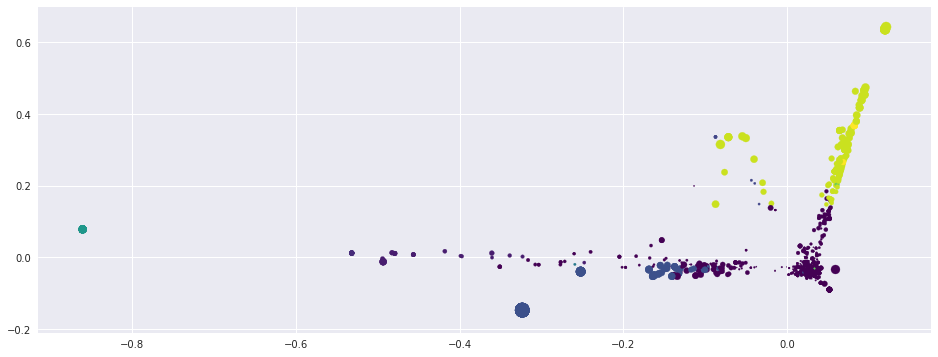

In [14]:
from sklearn.cluster import MiniBatchKMeans
N_CLASTERS = 50
labels = MiniBatchKMeans(N_CLASTERS, random_state=42).fit_predict(X)

fig, axes = plt.subplots(1, figsize=(16,6))
plt.scatter(
    data_projected[:, 0], data_projected[:, 1],
    cmap=plt.cm.get_cmap('viridis', N_CLASTERS),
    c = labels,
    s = data_projected[:,2]*200) # коэффициент 200 - для масштабирования точек согласно 3й гл. компоненте

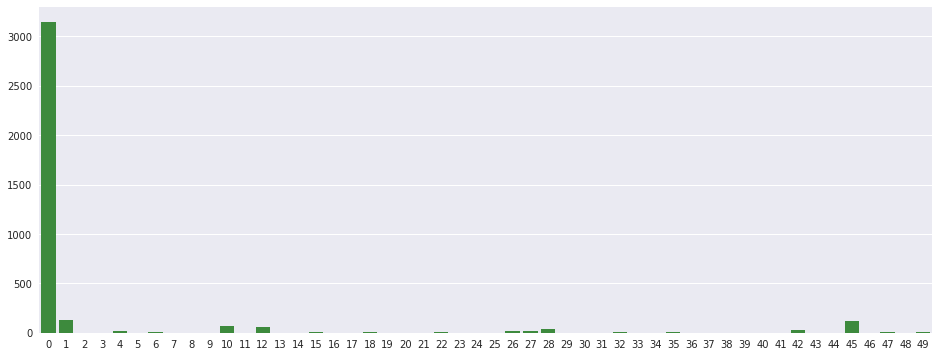

In [15]:
fig, axes = plt.subplots(1, figsize=(16,6))
sns.barplot(
    [i for i in range(N_CLASTERS)], 
    np.bincount(labels), 
    ax=axes, color='#309730')

### Примеры некоторых кластеров

In [38]:
corpus[labels==18]

1032    запасные части для автотракторной техники
1090     запасне части для автотракторной техники
2063    запасные части для автотракторной техники
2078    запасные части для автотракторной техники
3367             ремни для автотракторной техники
3368             ремни для автотракторной техники
Name: text, dtype: object

In [39]:
corpus[labels==32]

523           продукция электротехнического назначения
1181    электротехническое низковольтное оборудоование
2096      электротехническое низковоьтное оборудование
2496          продукция электротехнического назначения
2686          продукция электротехнического назначения
3061          продукция электротехнического назначения
3690          продукция электротехнического назначения
3691          продукция электротехнического назначения
4194          продукция электротехнического назначения
Name: text, dtype: object

In [40]:
corpus[labels==43]

365     оборудование для системы контроля и управления...
463     оборудование для системы контроля и управления...
1083               система контроля и управления доступом
Name: text, dtype: object

In [41]:
corpus[labels==49]

67      закупка запасных частей к комбайнам пк-8ма, пк...
1721    закупка запасных частей к комбайнам пк-8ма, пкс-8
1724    закупка запасных частей к комбайнам пк-8ма, пкс-8
3021    закупка запасных частей к комбайнам пк-8ма, пкс-8
4027    закупка запасных частей к (гидравлика) к комба...
Name: text, dtype: object

In [ ]:
corpus[labels==18]